In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [2]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

In [3]:
pipe = Pipeline([('s_sc', StandardScaler()),('pca', PCA(n_components=2,)), ('knn', KNeighborsClassifier(n_neighbors=5,))])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
pipe.fit(X_train, y_train)

test_score = pipe.score(X_test, y_test)
test_score

0.9

In [7]:
y_pred = pipe.predict(X_test)

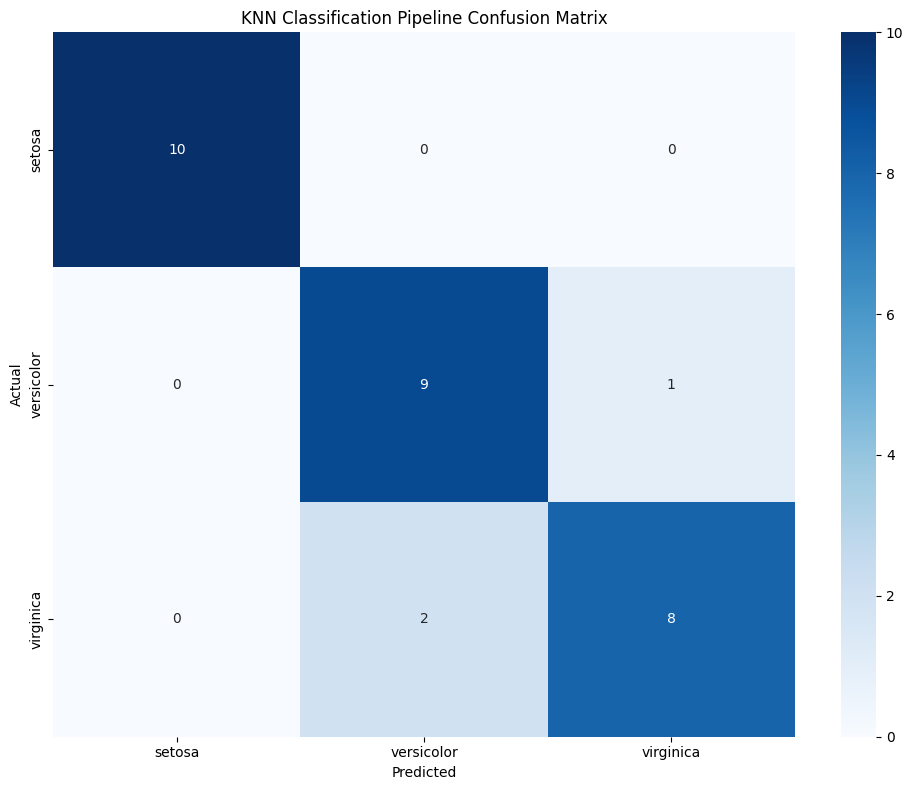

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('KNN Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Model incorrectly classifies
- 1 versicolor => virginica
- 2 virginica => versicolor

<h3>Using Cross-Validation

In [12]:
pipe = Pipeline([('s_sc', StandardScaler()), ('pca', PCA()), ('knn', KNeighborsClassifier())])

param = {'pca__n_components': [2, 3],
         'knn__n_neighbors': [3, 5, 7]
        }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = GridSearchCV(estimator=pipe, param_grid=param, cv=cv, scoring='accuracy', verbose=2)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('s_sc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

In [13]:
test_score = best_model.score(X_test, y_test)
print(f'{test_score:.3f}')

0.933


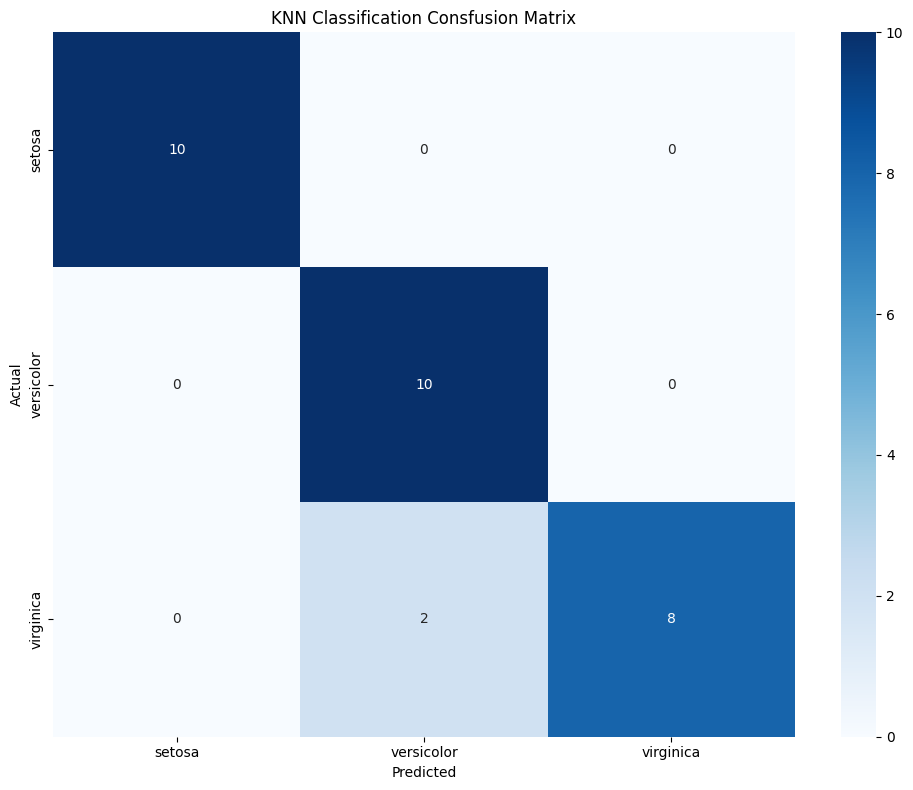

In [15]:
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

plt.title('KNN Classification Consfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()   

- Errors reduced
- Model incorrectly classifies: 2 virginica => versicolor